# Exploration and Comparison of Transformers for Image Classification

Comparison of the results for **every experiment** across all datasets for each model. 

This notebook also contains advanced data analysis for the results and serves as the basis for the thesis chapter: **Results and Discussion**.

## Prerequisites

Load necessary packages.

In [96]:
import os
os.chdir('..')
from utils.data_utils import *
from utils.visualization_utils import *
import pandas as pd
import numpy as np

Prepare dataset and model names as a list of strings.

In [97]:
dataset_names = ['RESISC45', 'Food-101', 'FER2013', 'PatchCamelyon', 'SUN397', 'DTD']
models = ['ViT', 'DeiT', 'Swin', 'CLIP']

## Zero-Shot Transfer using CLIP

Prepare prompt engineering templates as a list of strings.

In [98]:
experiments = ['Class label', 'Basic template', 'Custom template', 'OpenAI template']

Complete results taken from the individual notebooks of the experiment.

In [99]:
resisc45_zst = [0.543968, 0.565714, 0.595556, 0.616349]
food101_zst = [0.866693, 0.865703, 0.884911, 0.887366]
fer2013_zst = [0.408470, 0.454723, 0.458624, 0.435219]
pcam_zst = [0.558472, 0.553802, 0.536652, 0.540833]	
sun397_zst = [0.610943, 0.639218, 0.594529, 0.606483]
dtd_zst = [0.446809, 0.409043, 0.462234, 0.429255]

Aggregate results over datasets.

In [100]:
results_zst = [
    resisc45_zst,
    food101_zst,
    fer2013_zst,
    pcam_zst,
    sun397_zst,
    dtd_zst,
]

Wrap the results into a dictionary.

In [101]:
acc_dict_zst = create_accuracy_dict(
    results_zst,
    dataset_names
)

### Results

The complete results of the zero-shot transfer experiment shown in a table. The last three columns show the relative change (%) in accuracy for each prompting template in comparison to only using a class label.

In [102]:
df = pd.DataFrame(results_zst, columns=experiments, index=dataset_names)
df['Basic template (% Δ)'] = ((df['Basic template'] - df['Class label']) * 100).round(2)
df['Custom template (% Δ)'] = ((df['Custom template'] - df['Class label']) * 100).round(2)
df['OpenAI template (% Δ)'] = ((df['OpenAI template'] - df['Class label']) * 100).round(2)
df

,Class label,Basic template,Custom template,OpenAI template,Basic template (% Δ),Custom template (% Δ),OpenAI template (% Δ)
RESISC45,0.543968,0.565714,0.595556,0.616349,2.17,5.16,7.24
Food-101,0.866693,0.865703,0.884911,0.887366,-0.10,1.82,2.07
FER2013,0.408470,0.454723,0.458624,0.435219,4.63,5.02,2.67
PatchCamelyon,0.558472,0.553802,0.536652,0.540833,-0.47,-2.18,-1.76
SUN397,0.610943,0.639218,0.594529,0.606483,2.83,-1.64,-0.45
DTD,0.446809,0.409043,0.462234,0.429255,-3.78,1.54,-1.76


### Which prompt engineering strategy is the best for each dataset?

Find the best performing prompt engineering template for each dataset.

In [103]:
clip_best_results = []
for dataset, values in acc_dict_zst.items():
    max_value = max(values)
    best_model = experiments[values.index(max_value)]
    clip_best_results.append(max_value)
    print(f"For dataset {bold_string(dataset)}, the best approach is using {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best approach is using OpenAI template with an accuracy of 0.6163
For dataset Food-101, the best approach is using OpenAI template with an accuracy of 0.8874
For dataset FER2013, the best approach is using Custom template with an accuracy of 0.4586
For dataset PatchCamelyon, the best approach is using Class label with an accuracy of 0.5585
For dataset SUN397, the best approach is using Basic template with an accuracy of 0.6392
For dataset DTD, the best approach is using Custom template with an accuracy of 0.4622


### What is the mean and standard deviation of the relative change (%) in accuracy for each template?

Find the average change in accuracy for each template compared to the baseline approach.

In [104]:
desc = df.iloc[:, -3:].describe().T[['mean', 'std']].round(2)
print(desc)

                       mean   std
Basic template (% Δ)   0.88  2.97
Custom template (% Δ)  1.62  3.14
OpenAI template (% Δ)  1.34  3.45


Find the prompt engineering strategy that yielded the most significant improvement over the baseline approach.

In [105]:
print(f"Prompting with {bold_string('Basic template')} yields on average {bold_string(df['Basic template (% Δ)'].mean().round(2))} % better results than with only a class label.")
print(f"Prompting with {bold_string('Custom template')} yields on average {bold_string(df['Custom template (% Δ)'].mean().round(2))} % better results than with only a class label.")
print(f"Prompting with {bold_string('OpenAI template')} yields on average {bold_string(df['OpenAI template (% Δ)'].mean().round(2))} % better results than with only a class label.")

Prompting with Basic template yields on average 0.88 % better results than with only a class label.
Prompting with Custom template yields on average 1.62 % better results than with only a class label.
Prompting with OpenAI template yields on average 1.34 % better results than with only a class label.


Find the prompt engineering strategy that had the largest variance.

In [106]:
print(f"Prompting with {bold_string(desc['std'].idxmax())} has the biggest variance of {bold_string(round(max(desc['std']) ** 2, 2))}")

Prompting with OpenAI template (% Δ) has the biggest variance of 11.9


### Visualization of the results using bar plot

Plot the results of the experiment in a bar chart. Each bar corresponds to a prompt engineering template used by CLIP.

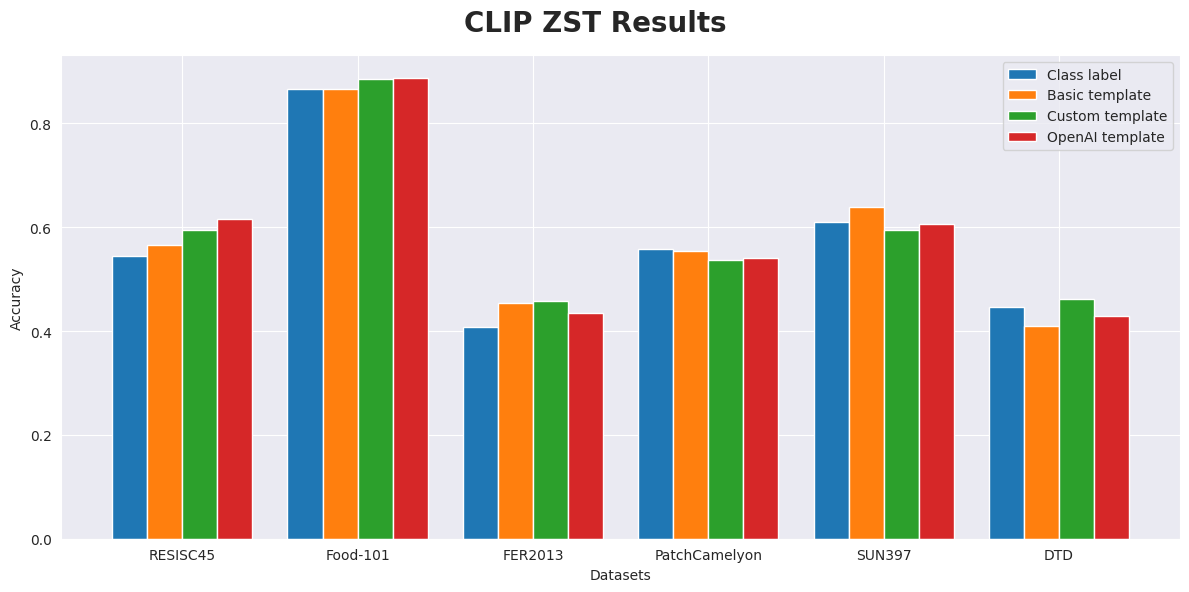

In [107]:
plot_results_bar(df, dataset_names, experiments, title="CLIP ZST Results")

### Visualization of the relative change when using templates

Plot the relative change in accuracy (%) for each template compared to the baseline approach.

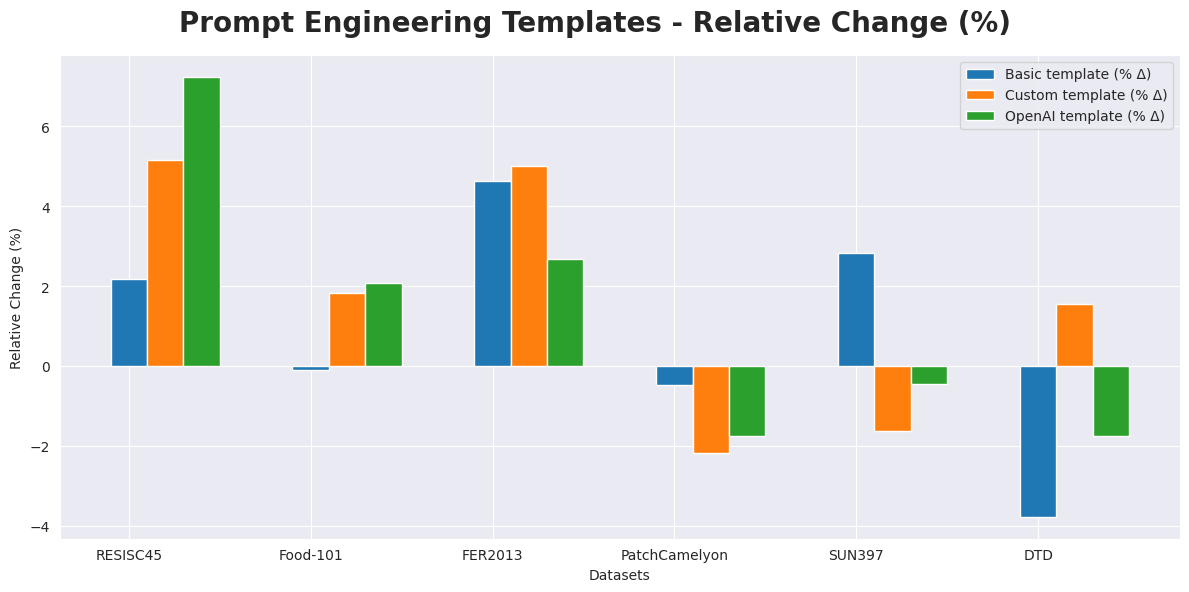

In [108]:
plot_relative_change(df.iloc[:, -3:], dataset_names, df.columns[-3:], title="Prompt Engineering Templates - Relative Change (%)", x_labels="Datasets")

### Which dataset posed the biggest challenge?

Check which dataset achieved the worst accuracy. The results are aggregated over the templates.

In [109]:
df[['mean', 'std']] = df[['Class label', 'Basic template', 'Custom template', 'OpenAI template']].agg(['mean', 'std'], axis=1)
df[['mean', 'std']]

,mean,std
RESISC45,0.580397,0.031964
Food-101,0.876168,0.011563
FER2013,0.439259,0.022938
PatchCamelyon,0.547440,0.010364
SUN397,0.612793,0.018931
DTD,0.436835,0.022909


Print the dataset that achieved the worst accuracy.

In [110]:
worst_dataset = df['mean'].idxmin()
worst_score = df.loc[worst_dataset, 'mean']
print(f"The dataset that posed the biggest challenge is {bold_string(worst_dataset)} with a mean accuracy of {bold_string(round(worst_score, 4))}")

The dataset that posed the biggest challenge is DTD with a mean accuracy of 0.4368


## Few-Shot Linear Probing

Prepare the individual n_shot points as a list of strings.

In [111]:
n_shots = [1, 2, 4, 8, 16]

Complete results taken from the individual notebooks of the experiment.

In [112]:
resisc45_vit_fslp = [0.281587, 0.386667, 0.531905, 0.616190, 0.691746]
food101_vit_fslp = [0.405149, 0.536436, 0.654970, 0.717149, 0.756554]
fer2013_vit_fslp = [0.308721, 0.309557, 0.311507, 0.309557, 0.419615]
pcam_vit_fslp = [0.302277, 0.372742, 0.468689, 0.720123, 0.717987]
sun397_vit_fslp = [0.427800, 0.534300, 0.612500, 0.659816, 0.657885]
dtd_vit_fslp = [0.270213, 0.361170, 0.456915, 0.521809, 0.594681]

resisc45_deit_fslp = [0.304762, 0.458095, 0.594127, 0.689206, 0.754762]
food101_deit_fslp = [0.198495, 0.301386, 0.425941, 0.520871, 0.597901]
fer2013_deit_fslp = [0.173865, 0.152689, 0.186960, 0.160490, 0.316801]
pcam_deit_fslp = [0.493317, 0.520508, 0.540375, 0.718689, 0.719208]
sun397_deit_fslp = [0.255264, 0.377425, 0.470023, 0.541471, 0.568368]
dtd_deit_fslp = [0.261170, 0.365426, 0.465957, 0.556915, 0.613830]

resisc45_swin_fslp = [0.339683, 0.481746, 0.632063, 0.711111, 0.761270]
food101_swin_fslp = [0.396554, 0.544277, 0.668792, 0.751485, 0.788792]
fer2013_swin_fslp = [0.276400, 0.250209, 0.317359, 0.363054, 0.437169]
pcam_swin_fslp = [0.466797, 0.484222, 0.426880, 0.749481, 0.762115]
sun397_swin_fslp = [0.406805, 0.529655, 0.622989, 0.671356, 0.691494]
dtd_swin_fslp = [0.373404, 0.467553, 0.522340, 0.589362, 0.651596]

resisc45_clip_fslp = [0.476032, 0.585079, 0.731587, 0.786508, 0.821429]
food101_clip_fslp = [0.358733, 0.535208, 0.646535, 0.727960, 0.785267]
fer2013_clip_fslp = [0.226247, 0.200613, 0.262190, 0.321538, 0.405127]
pcam_clip_fslp = [0.514862, 0.553131, 0.638550, 0.656250, 0.696045]
sun397_clip_fslp = [0.350621, 0.479172, 0.555402, 0.616552, 0.655724]
dtd_clip_fslp = [0.379787, 0.475532, 0.569681, 0.626596, 0.667021]

Aggregate results over datasets.

In [113]:
results_resisc45_fslp = [resisc45_vit_fslp, resisc45_deit_fslp, resisc45_swin_fslp, resisc45_clip_fslp]
results_food101_fslp = [food101_vit_fslp, food101_deit_fslp, food101_swin_fslp, food101_clip_fslp]
results_fer2013_fslp = [fer2013_vit_fslp, fer2013_deit_fslp, fer2013_swin_fslp, fer2013_clip_fslp]
results_pcam_fslp = [pcam_vit_fslp, pcam_deit_fslp, pcam_swin_fslp, pcam_clip_fslp]
results_sun397_fslp = [sun397_vit_fslp, sun397_deit_fslp, sun397_swin_fslp, sun397_clip_fslp]
results_dtd_fslp = [dtd_vit_fslp, dtd_deit_fslp, dtd_swin_fslp, dtd_clip_fslp]

Concatenate all results into a single variable.

In [114]:
results_fslp = [
    results_resisc45_fslp,
    results_food101_fslp,
    results_fer2013_fslp,
    results_pcam_fslp,
    results_sun397_fslp,
    results_dtd_fslp,
]

### Results

Results for each dataset shown in a table. The last four columns show the relative change (%) in accuracy when increasing the number of images (n_shot) shown to the model.

Create empty arrays to store the mean for the relative changes (%) mentioned above.

In [115]:
two_shot_mean = []
four_shot_mean = []
eight_shot_mean = []
sixteen_shot_mean = []

Aggregate the results into a single variable.

In [116]:
mean_list = [
    two_shot_mean,
    four_shot_mean,
    eight_shot_mean,
    sixteen_shot_mean,
]

#### RESISC45

In [117]:
df = create_few_shot_table(results_resisc45_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.281587,0.386667,0.531905,0.616190,0.691746,10.51,14.52,8.43,7.56
DeiT,0.304762,0.458095,0.594127,0.689206,0.754762,15.33,13.60,9.51,6.56
Swin,0.339683,0.481746,0.632063,0.711111,0.761270,14.21,15.03,7.90,5.02
CLIP,0.476032,0.585079,0.731587,0.786508,0.821429,10.90,14.65,5.49,3.49


In [118]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   12.74
4-shot (% Δ)   14.45
8-shot (% Δ)    7.83
16-shot (% Δ)   5.66


In [119]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### Food-101

In [120]:
df = create_few_shot_table(results_food101_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.405149,0.536436,0.654970,0.717149,0.756554,13.13,11.85,6.22,3.94
DeiT,0.198495,0.301386,0.425941,0.520871,0.597901,10.29,12.46,9.49,7.70
Swin,0.396554,0.544277,0.668792,0.751485,0.788792,14.77,12.45,8.27,3.73
CLIP,0.358733,0.535208,0.646535,0.727960,0.785267,17.65,11.13,8.14,5.73


In [121]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   13.96
4-shot (% Δ)   11.97
8-shot (% Δ)    8.03
16-shot (% Δ)   5.28


In [122]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### FER2013

In [123]:
df = create_few_shot_table(results_fer2013_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.308721,0.309557,0.311507,0.309557,0.419615,0.08,0.19,-0.19,11.01
DeiT,0.173865,0.152689,0.186960,0.160490,0.316801,-2.12,3.43,-2.65,15.63
Swin,0.276400,0.250209,0.317359,0.363054,0.437169,-2.62,6.71,4.57,7.41
CLIP,0.226247,0.200613,0.262190,0.321538,0.405127,-2.56,6.16,5.93,8.36


In [124]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   -1.81
4-shot (% Δ)    4.12
8-shot (% Δ)    1.92
16-shot (% Δ)  10.60


In [125]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### PatchCamelyon

In [126]:
df = create_few_shot_table(results_pcam_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.302277,0.372742,0.468689,0.720123,0.717987,7.05,9.59,25.14,-0.21
DeiT,0.493317,0.520508,0.540375,0.718689,0.719208,2.72,1.99,17.83,0.05
Swin,0.466797,0.484222,0.426880,0.749481,0.762115,1.74,-5.73,32.26,1.26
CLIP,0.514862,0.553131,0.638550,0.656250,0.696045,3.83,8.54,1.77,3.98


In [127]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)    3.84
4-shot (% Δ)    3.60
8-shot (% Δ)   19.25
16-shot (% Δ)   1.27


In [128]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### SUN397

In [129]:
df = create_few_shot_table(results_sun397_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.427800,0.534300,0.612500,0.659816,0.657885,10.65,7.82,4.73,-0.19
DeiT,0.255264,0.377425,0.470023,0.541471,0.568368,12.22,9.26,7.14,2.69
Swin,0.406805,0.529655,0.622989,0.671356,0.691494,12.28,9.33,4.84,2.01
CLIP,0.350621,0.479172,0.555402,0.616552,0.655724,12.86,7.62,6.12,3.92


In [130]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

                mean
2-shot (% Δ)   12.00
4-shot (% Δ)    8.51
8-shot (% Δ)    5.71
16-shot (% Δ)   2.11


In [131]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

#### DTD

In [132]:
df = create_few_shot_table(results_dtd_fslp, n_shots, models)
df

,1-shot,2-shot,4-shot,8-shot,16-shot,2-shot (% Δ),4-shot (% Δ),8-shot (% Δ),16-shot (% Δ)
ViT,0.270213,0.361170,0.456915,0.521809,0.594681,9.10,9.57,6.49,7.29
DeiT,0.261170,0.365426,0.465957,0.556915,0.613830,10.43,10.05,9.10,5.69
Swin,0.373404,0.467553,0.522340,0.589362,0.651596,9.41,5.48,6.70,6.22
CLIP,0.379787,0.475532,0.569681,0.626596,0.667021,9.57,9.41,5.69,4.04


In [133]:
desc = df.iloc[:, -4:].describe().T[['mean']].round(2)
print(desc)

               mean
2-shot (% Δ)   9.63
4-shot (% Δ)   8.63
8-shot (% Δ)   7.00
16-shot (% Δ)  5.81


In [134]:
for i, lst in enumerate(mean_list):
    lst.append(desc.iloc[i, 0])

### What was the mean change in accuracy when increasing the number of images per class processed by the model?

Print the average improvement when changing the number of shots from $k$ to $k + 1$.

In [135]:
df = pd.DataFrame(mean_list, columns=dataset_names, index=['2-shot (% Δ)', '4-shot (% Δ)', '8-shot (% Δ)', '16-shot (% Δ)'])
desc = df.T.describe().T[['mean']].round(2)
print(desc)

               mean
2-shot (% Δ)   8.39
4-shot (% Δ)   8.55
8-shot (% Δ)   8.29
16-shot (% Δ)  5.12


In [136]:
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('1 image')} to {bold_string('2 images')} yielded on average a {bold_string(desc.iloc[0, 0])} % higher accuracy.")
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('2 images')} to {bold_string('4 images')} yielded on average a {bold_string(desc.iloc[1, 0])} % higher accuracy.")
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('4 images')} to {bold_string('8 images')} yielded on average a {bold_string(desc.iloc[2, 0])} % higher accuracy.")
print(f"Increasing the {bold_string('number of images per class')} the model processed from {bold_string('8 images')} to {bold_string('16 images')} yielded on average a {bold_string(desc.iloc[3, 0])} % higher accuracy.")

Increasing the number of images per class the model processed from 1 image to 2 images yielded on average a 8.39 % higher accuracy.
Increasing the number of images per class the model processed from 2 images to 4 images yielded on average a 8.55 % higher accuracy.
Increasing the number of images per class the model processed from 4 images to 8 images yielded on average a 8.29 % higher accuracy.
Increasing the number of images per class the model processed from 8 images to 16 images yielded on average a 5.12 % higher accuracy.


### Which dataset posed the biggest challenge?

Check which dataset achieved the worst accuracy. The results are aggregated over the relative changes between shots.

Also print the worst dataset for each n_shot transition point.

In [137]:
relative_changes = np.array(mean_list)
changes = ['2-shot (% Δ)', '4-shot (% Δ)', '8-shot (% Δ)', '16-shot (% Δ)']
worst_datasets_indices = np.argmin(relative_changes[:, :len(dataset_names)], axis=1)
worst_datasets = [dataset_names[i] for i in worst_datasets_indices]
worst_datasets

['FER2013', 'PatchCamelyon', 'FER2013', 'PatchCamelyon']

In [138]:
for i, transition in enumerate(changes):
    min_index = np.argmin(relative_changes[i, :len(dataset_names)])
    worst_dataset = dataset_names[min_index]
    worst_value = relative_changes[i, min_index]
    print(f"The dataset that posed the biggest challenge for {transition} is {bold_string(worst_dataset)} with a average relative change of {bold_string(round(worst_value, 4))} % Δ")

The dataset that posed the biggest challenge for 2-shot (% Δ) is FER2013 with a average relative change of -1.81 % Δ
The dataset that posed the biggest challenge for 4-shot (% Δ) is PatchCamelyon with a average relative change of 3.6 % Δ
The dataset that posed the biggest challenge for 8-shot (% Δ) is FER2013 with a average relative change of 1.92 % Δ
The dataset that posed the biggest challenge for 16-shot (% Δ) is PatchCamelyon with a average relative change of 1.27 % Δ


### Visualization of Few-Shot Linear Probing

Plot the results of the experiment in a line plot. Each line represents how the model accuracy changes with increasing $k$.

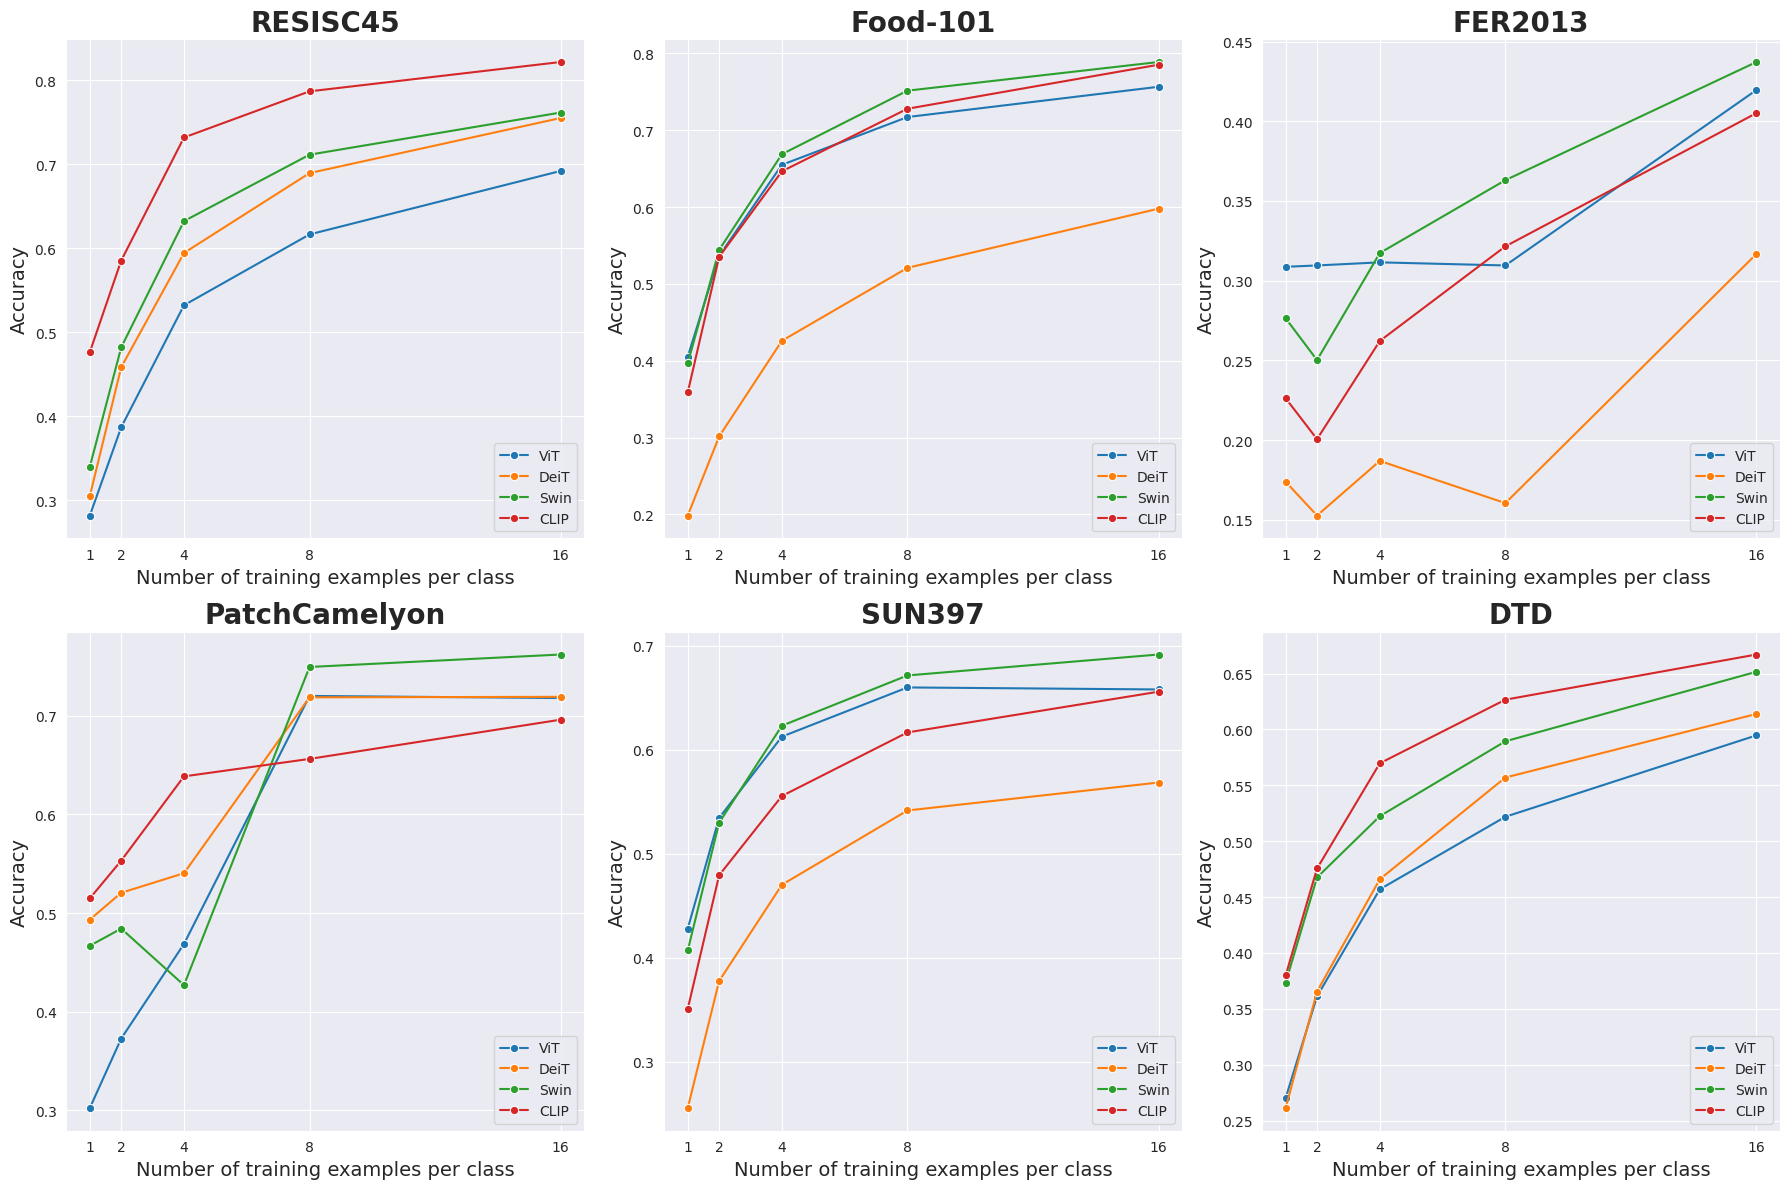

In [139]:
plot_few_shot_results_multiple(
    results_fslp, 
    dataset_names, 
    models,
)

## Linear Probing

Complete results taken from the individual notebooks of the experiment.

In [140]:
resisc45_vit_lp = 0.846349
food101_vit_lp = 0.859644
fer2013_vit_lp = 0.601839
pcam_vit_lp = 0.843079
sun397_vit_lp = 0.774529
dtd_vit_lp = 0.730319

resisc45_deit_lp = 0.886667
food101_deit_lp = 0.786297
fer2013_deit_lp = 0.527445
pcam_deit_lp = 0.832336
sun397_deit_lp = 0.726851
dtd_deit_lp = 0.714894

resisc45_swin_lp = 0.885397
food101_swin_lp = 0.894733
fer2013_swin_lp = 0.612148
pcam_swin_lp = 0.845551
sun397_swin_lp = 0.804184
dtd_swin_lp = 0.782447

resisc45_clip_lp = 0.898730
food101_clip_lp = 0.889149
fer2013_clip_lp = 0.670939
pcam_clip_lp = 0.836365
sun397_clip_lp = 0.790575
dtd_clip_lp = 0.726064

Aggregate results over datasets.

In [141]:
results_resisc45_lp = [resisc45_vit_lp, resisc45_deit_lp, resisc45_swin_lp, resisc45_clip_lp]
results_food101_lp = [food101_vit_lp, food101_deit_lp, food101_swin_lp, food101_clip_lp]
results_fer2013_lp = [fer2013_vit_lp, fer2013_deit_lp, fer2013_swin_lp, fer2013_clip_lp]
results_pcam_lp = [pcam_vit_lp, pcam_deit_lp, pcam_swin_lp, pcam_clip_lp]
results_sun397_lp = [sun397_vit_lp, sun397_deit_lp, sun397_swin_lp, sun397_clip_lp]
results_dtd_lp = [dtd_vit_lp, dtd_deit_lp, dtd_swin_lp, dtd_clip_lp]

Concatenate all results into a single variable.

In [142]:
results_lp = [
    results_resisc45_lp,
    results_food101_lp,
    results_fer2013_lp,
    results_pcam_lp,
    results_sun397_lp,
    results_dtd_lp,
]

Wrap the results into a dictionary.

In [143]:
acc_dict_lp = create_accuracy_dict(
    results_lp,
    dataset_names
)

Create a dataframe from the accuracy results.

In [144]:
df_lp = pd.DataFrame(results_lp, columns=[n for n in models], index=dataset_names)
df_lp

,ViT,DeiT,Swin,CLIP
RESISC45,0.846349,0.886667,0.885397,0.898730
Food-101,0.859644,0.786297,0.894733,0.889149
FER2013,0.601839,0.527445,0.612148,0.670939
PatchCamelyon,0.843079,0.832336,0.845551,0.836365
SUN397,0.774529,0.726851,0.804184,0.790575
DTD,0.730319,0.714894,0.782447,0.726064


### Which dataset posed the biggest challenge?

Check which dataset achieved the worst accuracy.

In [145]:
df_lp[['mean', 'std']] = df_lp[['ViT', 'DeiT', 'Swin', 'CLIP']].agg(['mean', 'std'], axis=1)
df_lp[['mean', 'std']]

,mean,std
RESISC45,0.879286,0.022765
Food-101,0.857456,0.049875
FER2013,0.603093,0.058905
PatchCamelyon,0.839333,0.006068
SUN397,0.774035,0.033710
DTD,0.738431,0.030056


Print the dataset that achieved the worst accuracy.

In [146]:
worst_dataset = df_lp['mean'].idxmin()
worst_score = df_lp.loc[worst_dataset, 'mean']
print(f"The dataset that posed the biggest challenge is {bold_string(worst_dataset)} with a mean accuracy of {bold_string(round(worst_score, 4))}")

The dataset that posed the biggest challenge is FER2013 with a mean accuracy of 0.6031


Print the model that achieved the highest accuracy for each dataset.

In [147]:
for dataset, values in acc_dict_lp.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset {bold_string(dataset)}, the best model using {bold_string('linear probing')} is {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best model using linear probing is CLIP with an accuracy of 0.8987
For dataset Food-101, the best model using linear probing is Swin with an accuracy of 0.8947
For dataset FER2013, the best model using linear probing is CLIP with an accuracy of 0.6709
For dataset PatchCamelyon, the best model using linear probing is Swin with an accuracy of 0.8456
For dataset SUN397, the best model using linear probing is Swin with an accuracy of 0.8042
For dataset DTD, the best model using linear probing is Swin with an accuracy of 0.7824


Plot the results of the experiment in a bar chart.

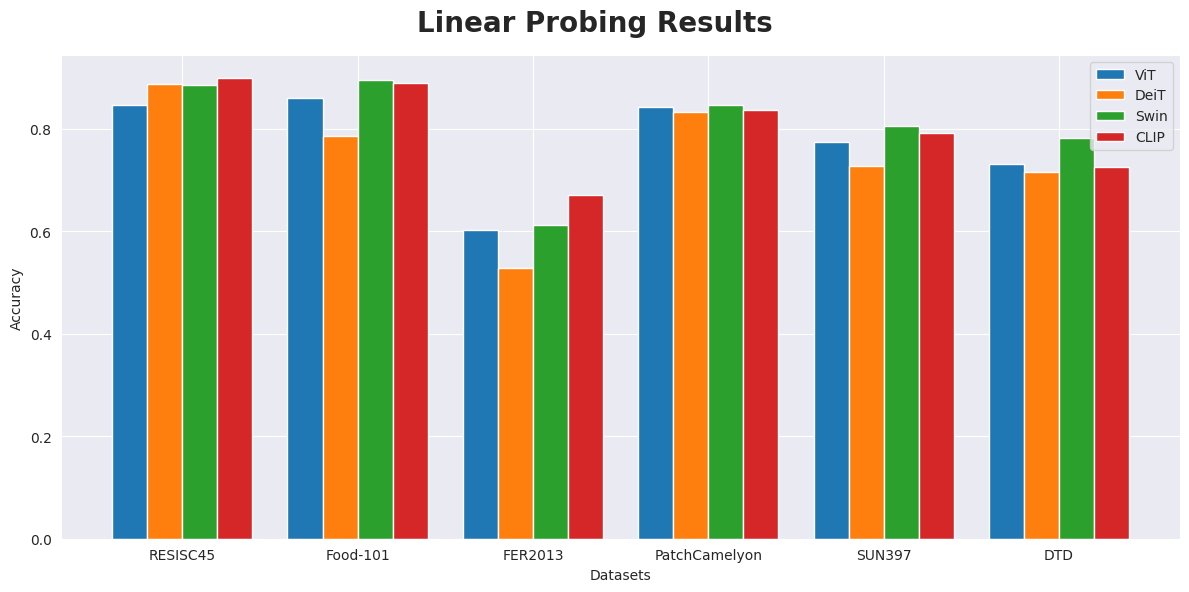

In [148]:
plot_results_bar(df_lp, dataset_names, models, title="Linear Probing Results")

## Fine-tuning

Complete results taken from the individual notebooks of the experiment.

In [149]:
resisc45_vit_ft = 0.946032
food101_vit_ft = 0.877861
fer2013_vit_ft = 0.697687
pcam_vit_ft = 0.888702
sun397_vit_ft = 0.763540
dtd_vit_ft = 0.788830

resisc45_deit_ft = 0.931429
food101_deit_ft = 0.857505
fer2013_deit_ft = 0.698245
pcam_deit_ft = 0.838531
sun397_deit_ft = 0.721149
dtd_deit_ft = 0.771277

resisc45_swin_ft = 0.958095
food101_swin_ft = 0.895842
fer2013_swin_ft = 0.703817
pcam_swin_ft = 0.850311
sun397_swin_ft = 0.778621
dtd_swin_ft = 0.821809

resisc45_clip_ft = 0.879524
food101_clip_ft = 0.794693
fer2013_clip_ft = 0.686542
pcam_clip_ft = 0.833099
sun397_clip_ft = 0.661333
dtd_clip_ft = 0.657447

Aggregate results over datasets.

In [150]:
results_resisc45_ft = [resisc45_vit_ft, resisc45_deit_ft, resisc45_swin_ft, resisc45_clip_ft]
results_food101_ft = [food101_vit_ft, food101_deit_ft, food101_swin_ft, food101_clip_ft]
results_fer2013_ft = [fer2013_vit_ft, fer2013_deit_ft, fer2013_swin_ft, fer2013_clip_ft]
results_pcam_ft = [pcam_vit_ft, pcam_deit_ft, pcam_swin_ft, pcam_clip_ft]
results_sun397_ft = [sun397_vit_ft, sun397_deit_ft, sun397_swin_ft, sun397_clip_ft]
results_dtd_ft = [dtd_vit_ft, dtd_deit_ft, dtd_swin_ft, dtd_clip_ft]

Concatenate all results into a single variable.

In [151]:
results_ft = [
    results_resisc45_ft,
    results_food101_ft,
    results_fer2013_ft,
    results_pcam_ft,
    results_sun397_ft,
    results_dtd_ft,
]

Wrap the results into a dictionary.

In [152]:
acc_dict_ft = create_accuracy_dict(
    results_ft,
    dataset_names
)

Create a dataframe from the accuracy results.

In [153]:
df_ft = pd.DataFrame(results_ft, columns=[n for n in models], index=dataset_names)
df_ft

,ViT,DeiT,Swin,CLIP
RESISC45,0.946032,0.931429,0.958095,0.879524
Food-101,0.877861,0.857505,0.895842,0.794693
FER2013,0.697687,0.698245,0.703817,0.686542
PatchCamelyon,0.888702,0.838531,0.850311,0.833099
SUN397,0.763540,0.721149,0.778621,0.661333
DTD,0.788830,0.771277,0.821809,0.657447


### Which dataset posed the biggest challenge?

Check which dataset achieved the worst accuracy.

In [154]:
df_ft[['mean', 'std']] = df_ft[['ViT', 'DeiT', 'Swin', 'CLIP']].agg(['mean', 'std'], axis=1)
df_ft[['mean', 'std']]

,mean,std
RESISC45,0.928770,0.034594
Food-101,0.856475,0.044065
FER2013,0.696573,0.007237
PatchCamelyon,0.852661,0.025079
SUN397,0.731161,0.052526
DTD,0.759841,0.071404


Print the dataset that achieved the worst accuracy.

In [155]:
worst_dataset = df_ft['mean'].idxmin()
worst_score = df_ft.loc[worst_dataset, 'mean']
print(f"The dataset that posed the biggest challenge is {bold_string(worst_dataset)} with a mean accuracy of {bold_string(round(worst_score, 4))}")

The dataset that posed the biggest challenge is FER2013 with a mean accuracy of 0.6966


Print the model that achieved the highest accuracy for each dataset.

In [156]:
for dataset, values in acc_dict_ft.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset {bold_string(dataset)}, the best model using {bold_string('fine-tuning')} is {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best model using fine-tuning is Swin with an accuracy of 0.9581
For dataset Food-101, the best model using fine-tuning is Swin with an accuracy of 0.8958
For dataset FER2013, the best model using fine-tuning is Swin with an accuracy of 0.7038
For dataset PatchCamelyon, the best model using fine-tuning is ViT with an accuracy of 0.8887
For dataset SUN397, the best model using fine-tuning is Swin with an accuracy of 0.7786
For dataset DTD, the best model using fine-tuning is Swin with an accuracy of 0.8218


Plot the results of the experiment in a bar chart.

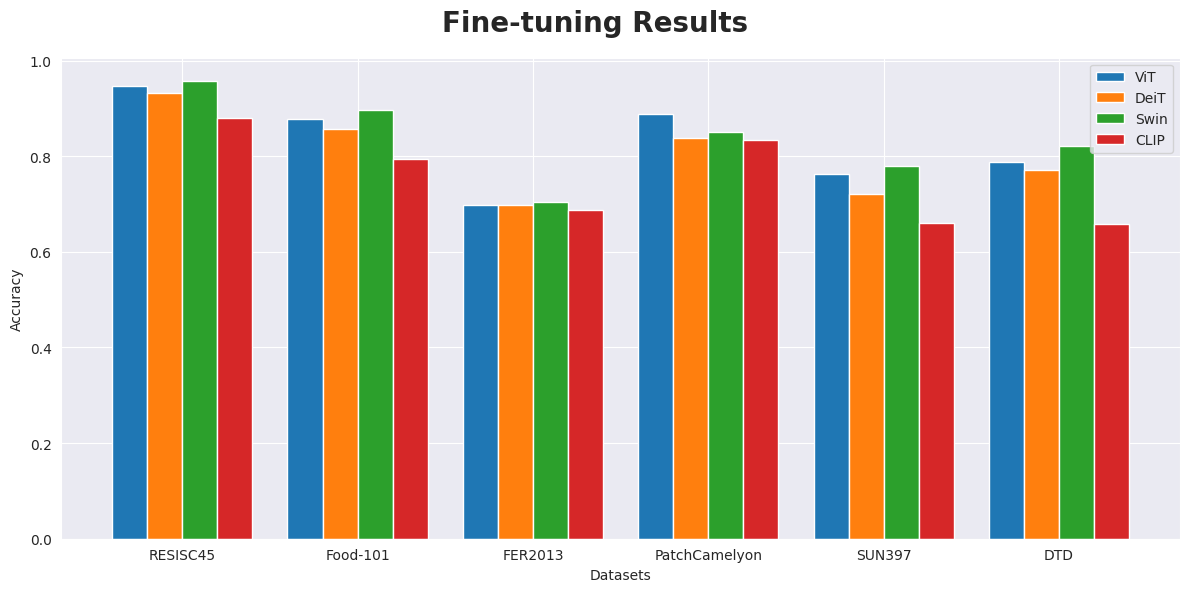

In [157]:
plot_results_bar(df_ft, dataset_names, models, title="Fine-tuning Results")

## Fine-tuning with Data Augmentations

Complete results taken from the individual notebooks of the experiment.

In [158]:
resisc45_vit_ftda = 0.950635
food101_vit_ftda = 0.872317
fer2013_vit_ftda = 0.709111
pcam_vit_ftda = 0.871582
sun397_vit_ftda = 0.770805
dtd_vit_ftda = 0.786702

resisc45_deit_ftda = 0.955397
food101_deit_ftda = 0.845109
fer2013_deit_ftda = 0.686821
pcam_deit_ftda = 0.881317
sun397_deit_ftda = 0.732966
dtd_deit_ftda = 0.772340

resisc45_swin_ftda = 0.948889
food101_swin_ftda = 0.901703
fer2013_swin_ftda = 0.715798
pcam_swin_ftda = 0.898834
sun397_swin_ftda = 0.789425
dtd_swin_ftda = 0.807447

resisc45_clip_ftda = 0.947778
food101_clip_ftda = 0.815089
fer2013_clip_ftda = 0.677069
pcam_clip_ftda = 0.840698
sun397_clip_ftda = 0.685517
dtd_clip_ftda = 0.703191

Aggregate results over datasets.

In [159]:
results_resisc45_ftda = [resisc45_vit_ftda, resisc45_deit_ftda, resisc45_swin_ftda, resisc45_clip_ftda]
results_food101_ftda = [food101_vit_ftda, food101_deit_ftda, food101_swin_ftda, food101_clip_ftda]
results_fer2013_ftda = [fer2013_vit_ftda, fer2013_deit_ftda, fer2013_swin_ftda, fer2013_clip_ftda]
results_pcam_ftda = [pcam_vit_ftda, pcam_deit_ftda, pcam_swin_ftda, pcam_clip_ftda]
results_sun397_ftda = [sun397_vit_ftda, sun397_deit_ftda, sun397_swin_ftda, sun397_clip_ftda]
results_dtd_ftda = [dtd_vit_ftda, dtd_deit_ftda, dtd_swin_ftda, dtd_clip_ftda]

Concatenate all results into a single variable.

In [160]:
results_ftda = [
    results_resisc45_ftda,
    results_food101_ftda,
    results_fer2013_ftda,
    results_pcam_ftda,
    results_sun397_ftda,
    results_dtd_ftda,
]

Wrap the results into a dictionary.

In [161]:
acc_dict_ftda = create_accuracy_dict(
    results_ftda,
    dataset_names
)

Create a dataframe from the accuracy results.

In [162]:
df_ftda = pd.DataFrame(results_ftda, columns=[n for n in models], index=dataset_names)
df_ftda

,ViT,DeiT,Swin,CLIP
RESISC45,0.950635,0.955397,0.948889,0.947778
Food-101,0.872317,0.845109,0.901703,0.815089
FER2013,0.709111,0.686821,0.715798,0.677069
PatchCamelyon,0.871582,0.881317,0.898834,0.840698
SUN397,0.770805,0.732966,0.789425,0.685517
DTD,0.786702,0.772340,0.807447,0.703191


### Which dataset posed the biggest challenge?

Check which dataset achieved the worst accuracy.

In [163]:
df_ftda[['mean', 'std']] = df_ftda[['ViT', 'DeiT', 'Swin', 'CLIP']].agg(['mean', 'std'], axis=1)
df_ftda[['mean', 'std']]

,mean,std
RESISC45,0.950675,0.003361
Food-101,0.858554,0.037064
FER2013,0.697200,0.018264
PatchCamelyon,0.873108,0.024372
SUN397,0.744678,0.045906
DTD,0.767420,0.045179


Print the dataset that achieved the worst accuracy.

In [164]:
worst_dataset = df_ftda['mean'].idxmin()
worst_score = df_ftda.loc[worst_dataset, 'mean']
print(f"The dataset that posed the biggest challenge is {bold_string(worst_dataset)} with a mean accuracy of {bold_string(round(worst_score, 4))}")

The dataset that posed the biggest challenge is FER2013 with a mean accuracy of 0.6972


Print the model that achieved the highest accuracy for each dataset.

In [165]:
for dataset, values in acc_dict_ftda.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset {bold_string(dataset)}, the best model using {bold_string('fine-tuning with data augmentations')} is {bold_string(best_model)} with an accuracy of {bold_string(f'{max_value:.4f}')}")

For dataset RESISC45, the best model using fine-tuning with data augmentations is DeiT with an accuracy of 0.9554
For dataset Food-101, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.9017
For dataset FER2013, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.7158
For dataset PatchCamelyon, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.8988
For dataset SUN397, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.7894
For dataset DTD, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.8074


Plot the results of the experiment in a bar chart.

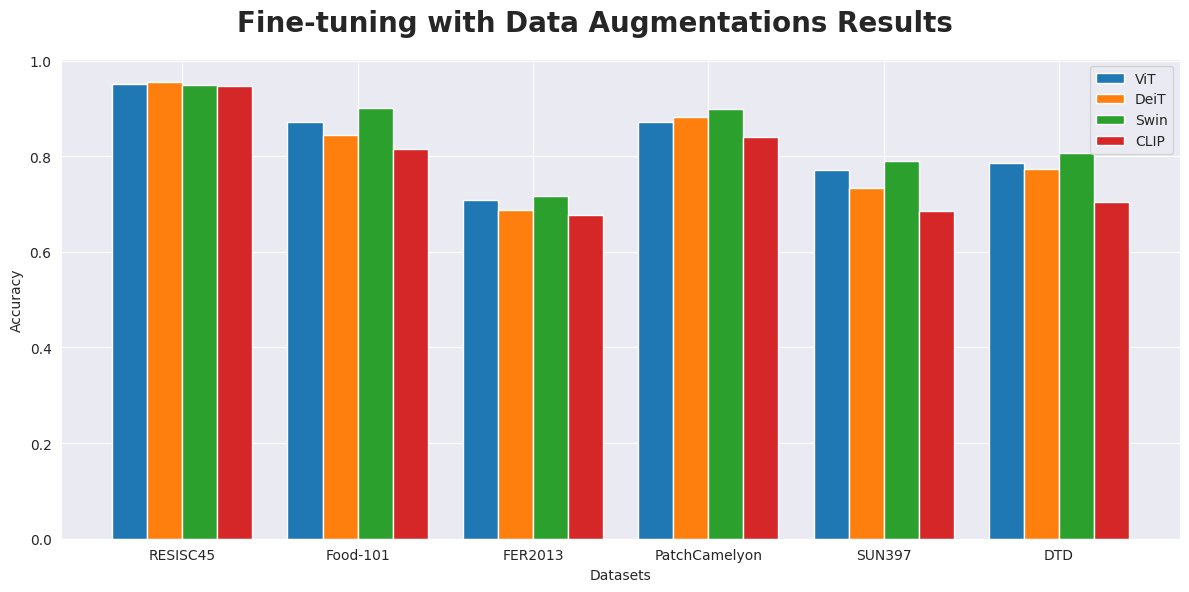

In [166]:
plot_results_bar(df_ftda, dataset_names, models, title="Fine-tuning with Data Augmentations Results")

## Which training strategy yielded the highest accuracy on average?

Convert the results of each fully supervised training experiment into a numpy array.

In [167]:
results_lp_np = np.array(results_lp)
results_ft_np = np.array(results_ft)
results_ftda_np = np.array(results_ftda)
results_agg = np.hstack((results_lp_np, results_ft_np, results_ftda_np))

### Vision Transformer (ViT)

Create a dataframe that calculates the difference in accuracy between the experimental setups for this model.

In [168]:
df = pd.DataFrame(results_agg[:, [0, 4, 8]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,9.97,10.43,0.46
Food-101,1.82,1.27,-0.55
FER2013,9.58,10.73,1.14
PatchCamelyon,4.56,2.85,-1.71
SUN397,-1.10,-0.37,0.73
DTD,5.85,5.64,-0.21


Print the average accuracy of each experiment for this model.

In [169]:
print(f"For model {bold_string('ViT')}, {bold_string('linear probing')} yields on average accuracy of {round(df['linear probing'].mean(), 4)}")
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning')} yields on average accuracy of {round(df['fine-tuning'].mean(), 4)}")
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning with data augmentations')} yields on average accuracy of {round(df['fine-tuning with data augmentations'].mean(), 4)}")

For model ViT, linear probing yields on average accuracy of 0.776
For model ViT, fine-tuning yields on average accuracy of 0.8271
For model ViT, fine-tuning with data augmentations yields on average accuracy of 0.8269


Print the average change in accuracy between the experimental setups.

In [170]:
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('ViT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % worse results than {bold_string('fine-tuning')}.")

For model ViT, fine-tuning yielded on average 5.11 % better results than linear probing.
For model ViT, fine-tuning with data augmentations yielded on average 5.09 % better results than linear probing.
For model ViT, fine-tuning with data augmentations yielded on average -0.02 % worse results than fine-tuning.


Print the best-performing experimental setup for this model in each dataset.

In [171]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('ViT')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model ViT performed the best using fine-tuning with data augmentations with an accuracy of 0.9506
For dataset Food-101, model ViT performed the best using fine-tuning with an accuracy of 0.8779
For dataset FER2013, model ViT performed the best using fine-tuning with data augmentations with an accuracy of 0.7091
For dataset PatchCamelyon, model ViT performed the best using fine-tuning with an accuracy of 0.8887
For dataset SUN397, model ViT performed the best using linear probing with an accuracy of 0.7745
For dataset DTD, model ViT performed the best using fine-tuning with an accuracy of 0.7888


### Data-efficient image Transformer (DeiT)

Create a dataframe that calculates the difference in accuracy between the experimental setups for this model.

In [172]:
df = pd.DataFrame(results_agg[:, [1, 5, 9]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,4.48,6.87,2.40
Food-101,7.12,5.88,-1.24
FER2013,17.08,15.94,-1.14
PatchCamelyon,0.62,4.90,4.28
SUN397,-0.57,0.61,1.18
DTD,5.64,5.74,0.11


Print the average accuracy of each experiment for this model.

In [173]:
print(f"For model {bold_string('DeiT')}, {bold_string('linear probing')} yields on average accuracy of {round(df['linear probing'].mean(), 4)}")
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning')} yields on average accuracy of {round(df['fine-tuning'].mean(), 4)}")
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning with data augmentations')} yields on average accuracy of {round(df['fine-tuning with data augmentations'].mean(), 4)}")

For model DeiT, linear probing yields on average accuracy of 0.7457
For model DeiT, fine-tuning yields on average accuracy of 0.803
For model DeiT, fine-tuning with data augmentations yields on average accuracy of 0.8123


Print the average change in accuracy between the experimental setups.

In [174]:
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('DeiT')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('fine-tuning')}.")

For model DeiT, fine-tuning yielded on average 5.73 % better results than linear probing.
For model DeiT, fine-tuning with data augmentations yielded on average 6.66 % better results than linear probing.
For model DeiT, fine-tuning with data augmentations yielded on average 0.93 % better results than fine-tuning.


Print the best-performing experimental setup for this model in each dataset.

In [175]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('DeiT')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.9554
For dataset Food-101, model DeiT performed the best using fine-tuning with an accuracy of 0.8575
For dataset FER2013, model DeiT performed the best using fine-tuning with an accuracy of 0.6982
For dataset PatchCamelyon, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.8813
For dataset SUN397, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.733
For dataset DTD, model DeiT performed the best using fine-tuning with data augmentations with an accuracy of 0.7723


### Swin Transformer (Swin)

Create a dataframe that calculates the difference in accuracy between the experimental setups for this model.

In [176]:
df = pd.DataFrame(results_agg[:, [2, 6, 10]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,7.27,6.35,-0.92
Food-101,0.11,0.70,0.59
FER2013,9.17,10.37,1.20
PatchCamelyon,0.48,5.33,4.85
SUN397,-2.56,-1.48,1.08
DTD,3.94,2.50,-1.44


Print the average accuracy of each experiment for this model.

In [177]:
print(f"For model {bold_string('Swin')}, {bold_string('linear probing')} yields on average accuracy of {round(df['linear probing'].mean(), 4)}")
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning')} yields on average accuracy of {round(df['fine-tuning'].mean(), 4)}")
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning with data augmentations')} yields on average accuracy of {round(df['fine-tuning with data augmentations'].mean(), 4)}")

For model Swin, linear probing yields on average accuracy of 0.8041
For model Swin, fine-tuning yields on average accuracy of 0.8347
For model Swin, fine-tuning with data augmentations yields on average accuracy of 0.8437


Print the average change in accuracy between the experimental setups.

In [178]:
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('linear probing')}.")
print(f"For model {bold_string('Swin')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('fine-tuning')}.")

For model Swin, fine-tuning yielded on average 3.07 % better results than linear probing.
For model Swin, fine-tuning with data augmentations yielded on average 3.96 % better results than linear probing.
For model Swin, fine-tuning with data augmentations yielded on average 0.89 % better results than fine-tuning.


Print the best-performing experimental setup for this model in each dataset.

In [179]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('Swin')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model Swin performed the best using fine-tuning with an accuracy of 0.9581
For dataset Food-101, model Swin performed the best using fine-tuning with data augmentations with an accuracy of 0.9017
For dataset FER2013, model Swin performed the best using fine-tuning with data augmentations with an accuracy of 0.7158
For dataset PatchCamelyon, model Swin performed the best using fine-tuning with data augmentations with an accuracy of 0.8988
For dataset SUN397, model Swin performed the best using linear probing with an accuracy of 0.8042
For dataset DTD, model Swin performed the best using fine-tuning with an accuracy of 0.8218


### Contrastive Language-Image Pre-Training (CLIP)

Create a dataframe that calculates the difference in accuracy between the experimental setups for this model.

In [180]:
df = pd.DataFrame(results_agg[:, [3, 7, 11]], columns=['linear probing', 'fine-tuning', 'fine-tuning with data augmentations'], index=dataset_names)
df['lp vs. ft (% Δ)'] = ((df['fine-tuning'] - df['linear probing']) * 100).round(2)
df['lp vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['linear probing']) * 100).round(2)
df['ft vs. ftda (% Δ)'] = ((df['fine-tuning with data augmentations'] - df['fine-tuning']) * 100).round(2)
df_rel = df.iloc[:, -3:]
df_rel

,lp vs. ft (% Δ),lp vs. ftda (% Δ),ft vs. ftda (% Δ)
RESISC45,-1.92,4.90,6.83
Food-101,-9.45,-7.41,2.04
FER2013,1.56,0.61,-0.95
PatchCamelyon,-0.33,0.43,0.76
SUN397,-12.92,-10.51,2.42
DTD,-6.86,-2.29,4.57


Print the average accuracy of each experiment for this model.

In [181]:
print(f"For model {bold_string('CLIP')}, {bold_string('linear probing')} yields on average accuracy of {round(df['linear probing'].mean(), 4)}")
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning')} yields on average accuracy of {round(df['fine-tuning'].mean(), 4)}")
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning with data augmentations')} yields on average accuracy of {round(df['fine-tuning with data augmentations'].mean(), 4)}")

For model CLIP, linear probing yields on average accuracy of 0.802
For model CLIP, fine-tuning yields on average accuracy of 0.7521
For model CLIP, fine-tuning with data augmentations yields on average accuracy of 0.7782


Print the average change in accuracy between the experimental setups.

In [182]:
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning')} yielded on average {bold_string(df['lp vs. ft (% Δ)'].mean().round(2))} % worse results than {bold_string('linear probing')}.")
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['lp vs. ftda (% Δ)'].mean().round(2))} % worse results than {bold_string('linear probing')}.")
print(f"For model {bold_string('CLIP')}, {bold_string('fine-tuning with data augmentations')} yielded on average {bold_string(df['ft vs. ftda (% Δ)'].mean().round(2))} % better results than {bold_string('fine-tuning')}.")

For model CLIP, fine-tuning yielded on average -4.99 % worse results than linear probing.
For model CLIP, fine-tuning with data augmentations yielded on average -2.38 % worse results than linear probing.
For model CLIP, fine-tuning with data augmentations yielded on average 2.61 % better results than fine-tuning.


Print the best-performing experimental setup for this model in each dataset.

In [183]:
for i, row in df.iloc[:, :3].iterrows():
    print(f"For dataset {bold_string(i)}, model {bold_string('CLIP')} performed the best using {bold_string(row.idxmax())} with an accuracy of {bold_string(row.max().round(4))}")

For dataset RESISC45, model CLIP performed the best using fine-tuning with data augmentations with an accuracy of 0.9478
For dataset Food-101, model CLIP performed the best using linear probing with an accuracy of 0.8891
For dataset FER2013, model CLIP performed the best using fine-tuning with an accuracy of 0.6865
For dataset PatchCamelyon, model CLIP performed the best using fine-tuning with data augmentations with an accuracy of 0.8407
For dataset SUN397, model CLIP performed the best using linear probing with an accuracy of 0.7906
For dataset DTD, model CLIP performed the best using linear probing with an accuracy of 0.7261


## Which combination of training strategy and model yielded the highest accuracy for each dataset?

Prepare the dataframe columns; combination of model and experimental setup.

In [184]:
cols = [
    'ViT (LP)',
    'DeiT (LP)',
    'Swin (LP)',
    'CLIP (LP)',
    'ViT (FT)',
    'DeiT (FT)',
    'Swin (FT)',
    'CLIP (FT)',
    'ViT (FTDA)',
    'DeiT (FTDA)',
    'Swin (FTDA)',
    'CLIP (FTDA)',
]

Create a dataframe that summarizes the results for each combination of model and dataset for the three fully supervised training experiments.

In [185]:
df = pd.DataFrame(results_agg, columns=cols, index=dataset_names)
df

,ViT (LP),DeiT (LP),Swin (LP),CLIP (LP),ViT (FT),DeiT (FT),Swin (FT),CLIP (FT),ViT (FTDA),DeiT (FTDA),Swin (FTDA),CLIP (FTDA)
RESISC45,0.846349,0.886667,0.885397,0.898730,0.946032,0.931429,0.958095,0.879524,0.950635,0.955397,0.948889,0.947778
Food-101,0.859644,0.786297,0.894733,0.889149,0.877861,0.857505,0.895842,0.794693,0.872317,0.845109,0.901703,0.815089
FER2013,0.601839,0.527445,0.612148,0.670939,0.697687,0.698245,0.703817,0.686542,0.709111,0.686821,0.715798,0.677069
PatchCamelyon,0.843079,0.832336,0.845551,0.836365,0.888702,0.838531,0.850311,0.833099,0.871582,0.881317,0.898834,0.840698
SUN397,0.774529,0.726851,0.804184,0.790575,0.763540,0.721149,0.778621,0.661333,0.770805,0.732966,0.789425,0.685517
DTD,0.730319,0.714894,0.782447,0.726064,0.788830,0.771277,0.821809,0.657447,0.786702,0.772340,0.807447,0.703191


Print the model with the highest accuracy on each dataset with a corresponding experimental setup.

In [186]:
for dataset in df.index:
    best_comb = df.loc[dataset].idxmax()
    best_accuracy = df.loc[dataset].max()
    print(f"For dataset {bold_string(dataset)}, the best combination was {bold_string(best_comb)} with accuracy of {bold_string(f'{best_accuracy:.4f}')}")

For dataset RESISC45, the best combination was Swin (FT) with accuracy of 0.9581
For dataset Food-101, the best combination was Swin (FTDA) with accuracy of 0.9017
For dataset FER2013, the best combination was Swin (FTDA) with accuracy of 0.7158
For dataset PatchCamelyon, the best combination was Swin (FTDA) with accuracy of 0.8988
For dataset SUN397, the best combination was Swin (LP) with accuracy of 0.8042
For dataset DTD, the best combination was Swin (FT) with accuracy of 0.8218


## Is model performance correlated across tasks or datasets?

Create a correlation matrix that shows the $r$ correlation of the model performance across the fully supervised training experiments.

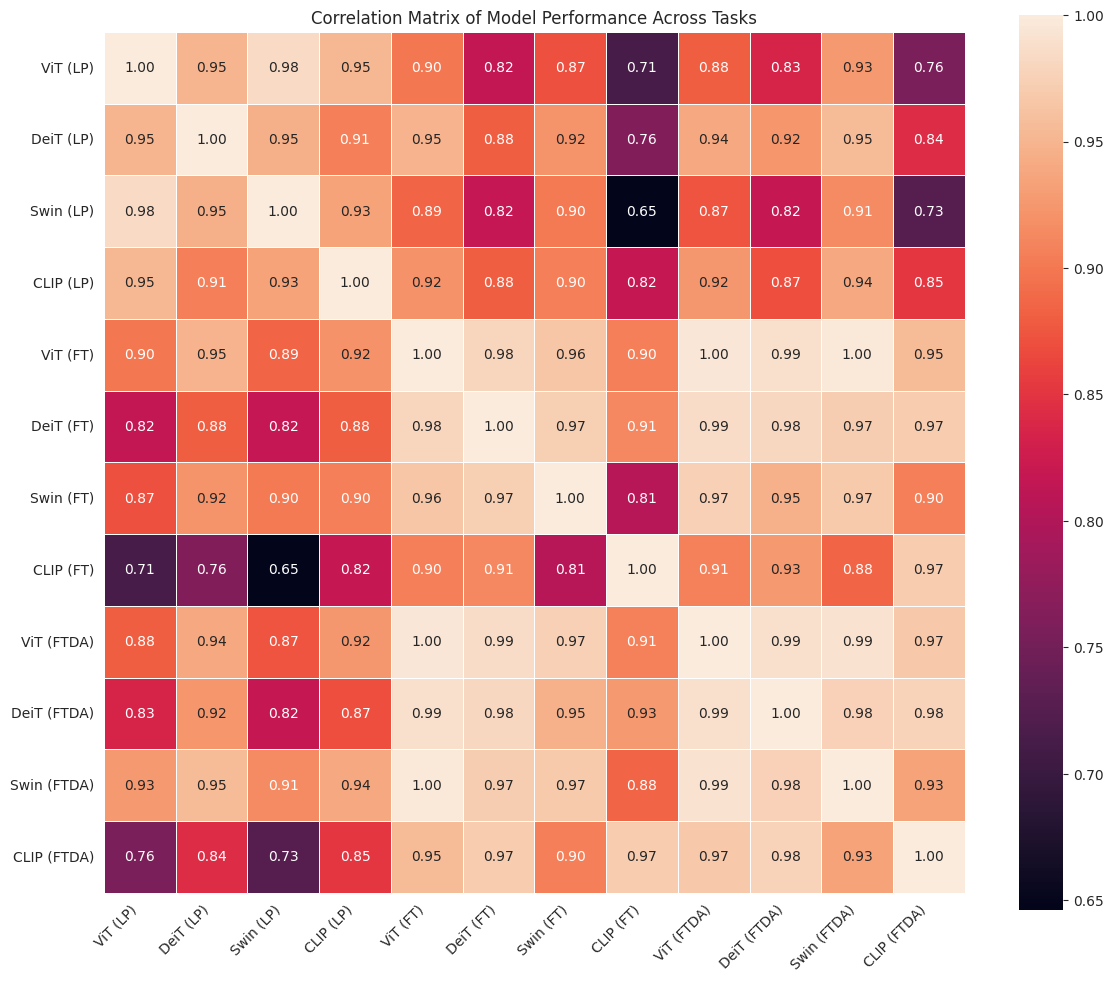

In [187]:
corr_tasks = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_tasks, annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Model Performance Across Tasks")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Create a correlation matrix that shows the $r$ correlation of the model performance across the datasets.

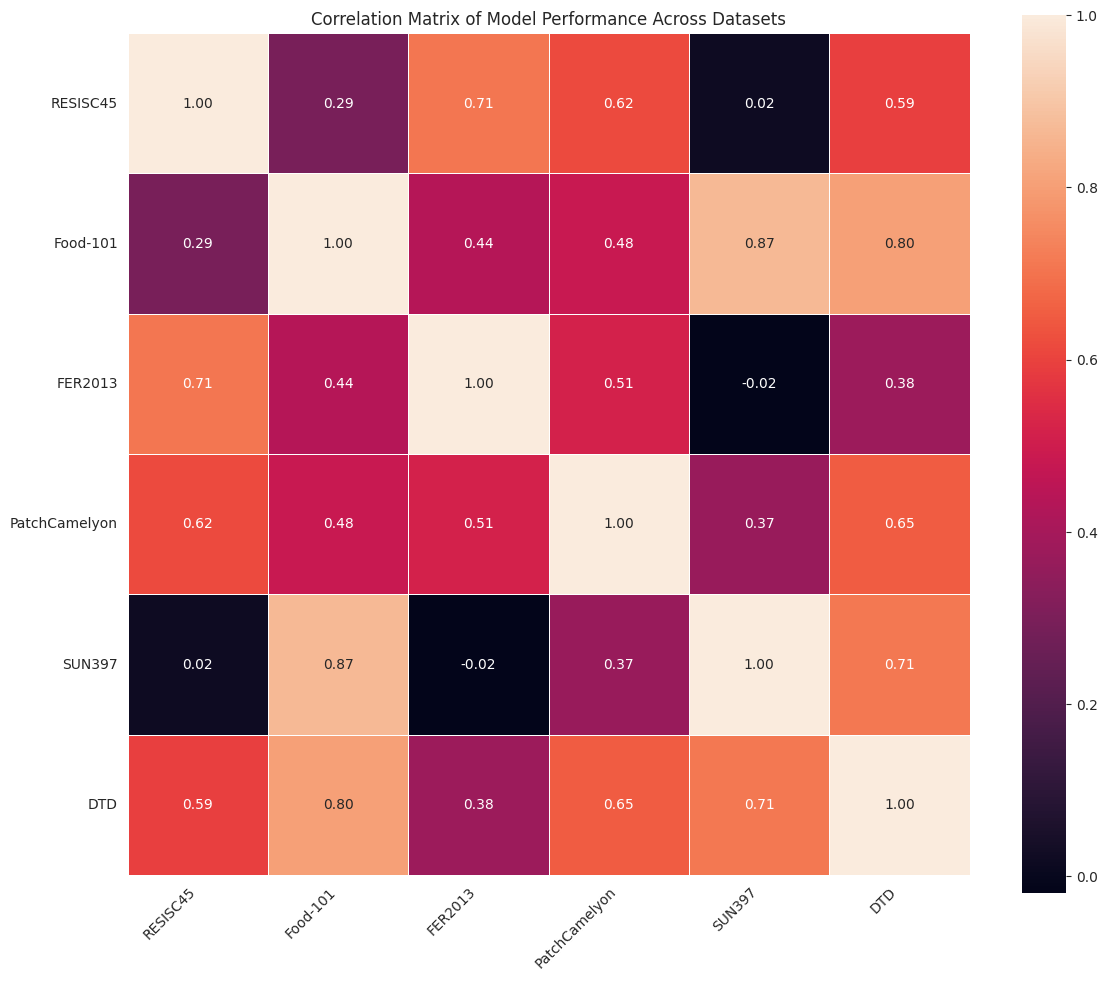

In [188]:
corr_matrix_datasets = df.T.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_datasets, annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Model Performance Across Datasets")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Is there a scenario where CLIP ZST (highest accuracy template) outperforms any of models trained in supervised setting?

Extract the best-performing prompt engineering template results from the CLIP ZST experiment for each dataset.

Display the results in a dataframe for comparison.

In [189]:
df['CLIP ZST'] = clip_best_results
df

,ViT (LP),DeiT (LP),Swin (LP),CLIP (LP),ViT (FT),DeiT (FT),Swin (FT),CLIP (FT),ViT (FTDA),DeiT (FTDA),Swin (FTDA),CLIP (FTDA),CLIP ZST
RESISC45,0.846349,0.886667,0.885397,0.898730,0.946032,0.931429,0.958095,0.879524,0.950635,0.955397,0.948889,0.947778,0.616349
Food-101,0.859644,0.786297,0.894733,0.889149,0.877861,0.857505,0.895842,0.794693,0.872317,0.845109,0.901703,0.815089,0.887366
FER2013,0.601839,0.527445,0.612148,0.670939,0.697687,0.698245,0.703817,0.686542,0.709111,0.686821,0.715798,0.677069,0.458624
PatchCamelyon,0.843079,0.832336,0.845551,0.836365,0.888702,0.838531,0.850311,0.833099,0.871582,0.881317,0.898834,0.840698,0.558472
SUN397,0.774529,0.726851,0.804184,0.790575,0.763540,0.721149,0.778621,0.661333,0.770805,0.732966,0.789425,0.685517,0.639218
DTD,0.730319,0.714894,0.782447,0.726064,0.788830,0.771277,0.821809,0.657447,0.786702,0.772340,0.807447,0.703191,0.462234


Check if a scenario exists where CLIP ZST outperforms any of the models trained in a fully supervised setup.

In [190]:
supervised_models = [col for col in df.columns if 'CLIP ZST' not in col]
print("Examples of where CLIP ZST outperformed supervised models:")

for idx, row in df.iterrows():
    zst_acc = row['CLIP ZST']
    outperformed = [col for col in supervised_models if zst_acc > row[col]]

    if outperformed:
        print(f"  Dataset: {bold_string(idx)}")
        print(f"    CLIP ZST accuracy: {bold_string(round(zst_acc, 4))}")
        print("    Outperformed these supervised models:")
        for col in outperformed:
            print(f"      {col}: {bold_string(round(row[col], 4))}")

Examples of where CLIP ZST outperformed supervised models:
  Dataset: Food-101
    CLIP ZST accuracy: 0.8874
    Outperformed these supervised models:
      ViT (LP): 0.8596
      DeiT (LP): 0.7863
      ViT (FT): 0.8779
      DeiT (FT): 0.8575
      CLIP (FT): 0.7947
      ViT (FTDA): 0.8723
      DeiT (FTDA): 0.8451
      CLIP (FTDA): 0.8151
